<a href="https://colab.research.google.com/github/ezzxdn/DIF62128_A_25_2311532001_Ezza-A/blob/master/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#Load dataset
dataset_url = 'https://raw.githubusercontent.com/ezzxdn/DIF62128_A_25_2311532001_Ezza-A/refs/heads/master/Dataset/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Selecting Features**

Selecting features berarti memilih kolom-kolom yang relevan (dalam hal ini, yang ada di feature_cols) dari dataset df untuk digunakan dalam analisis atau pelatihan model pembelajaran mesin.

Pada kode di bawah, selecting features merujuk pada pemilihan kolom atau atribut dari dataset yang akan digunakan sebagai input untuk model pembelajaran mesin (machine learning).

In [2]:
from re import X
#split dataset in features
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols]
y = df.Outcome

In [3]:
print(X.shape)
print(y.shape)

(768, 7)
(768,)


# **Splitting Data**

Fungsi dari splitting data adalah untuk memastikan bahwa model dapat dilatih dengan data dan kemudian dievaluasi pada data yang terpisah, sehingga kamu bisa menilai performa model dengan cara yang lebih objektif.

Pada kode tersebut, splitting data berfungsi untuk membagi dataset menjadi dua bagian: training set dan testing set.
1. X_train dan y_train adalah subset data yang akan digunakan untuk melatih model pembelajaran mesin. Artinya, model akan "belajar" dari data ini untuk menemukan pola atau hubungan antara fitur (X) dan target (y).
2. X_test dan y_test adalah subset data yang akan digunakan untuk menguji kinerja model setelah dilatih. Data ini tidak digunakan selama proses pelatihan, sehingga dapat memberikan evaluasi objektif terhadap bagaimana model bekerja pada data yang belum pernah dilihat sebelumnya.

Parameter yang digunakan dalam train_test_split:
1. X dan y adalah data fitur dan target yang ingin dibagi.
2. test_size=0.30 berarti 30% dari data akan digunakan untuk testing, sementara sisanya 70% digunakan untuk training.
3. random_state=16 digunakan untuk mengontrol pembagian data yang dilakukan secara acak. Dengan menetapkan nilai ini, kamu memastikan bahwa pembagian data selalu konsisten setiap kali kode dijalankan (reproducibility).

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

# **Model Development and Prediction**

Pada kode ini, secara keseluruhan melakukan hal berikut:
1. Membuat model regresi logistik.
2. Melatih model dengan data pelatihan.
3. Menggunakan model yang sudah dilatih untuk memprediksi hasil pada data uji yang belum pernah dilihat oleh model.

Ini adalah langkah penting dalam proses evaluasi kinerja model, karena dengan menggunakan data uji yang terpisah, kita bisa mengetahui seberapa baik model memprediksi hasil yang belum dilihat sebelumnya.

In [6]:
from sklearn.linear_model import LogisticRegression

#Instantiate the model (using default parameterd)
logreg = LogisticRegression(random_state = 16)

#fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# **Model Evaluation using Confusion Matrix**

1. True Positive: model memprediksi positif dan hasil aktualnya positif.
2. False Positive: model memprediksi positif dan hasil aktualnya negatif.
3. True Negative: model memprediksi negatif dan hasil aktualnya negatif.
4. False Negative: model memprediksi negatif dan hasil aktualnya positif.

In [7]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[134,  13],
       [ 35,  49]])

Text(0.5, 1.1, 'Confusion Matrix')

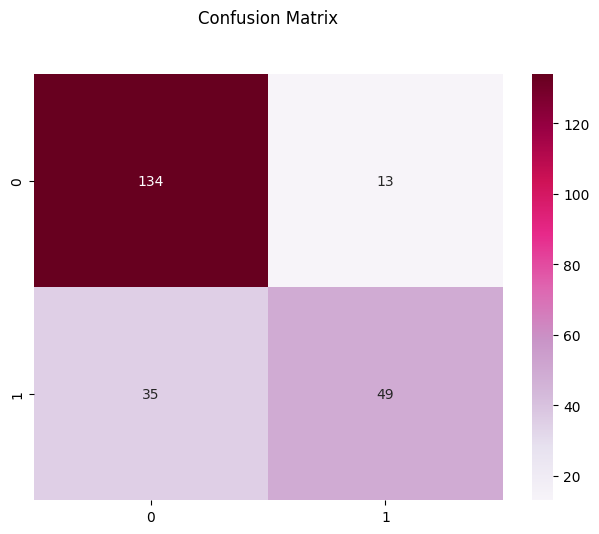

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='PuRd', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)

# **Confusion Matrix Evaluation Metrics**
1. Akurasi
2. Presisi
3. Recall
4. F1 Score
5. Specificity

In [9]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.91      0.85       147
   with diabetes       0.79      0.58      0.67        84

        accuracy                           0.79       231
       macro avg       0.79      0.75      0.76       231
    weighted avg       0.79      0.79      0.78       231



# **ROC Curve**
Receiver Operating Characteristic: grafik untuk mengevaluasi kinerja model klasifikasi.

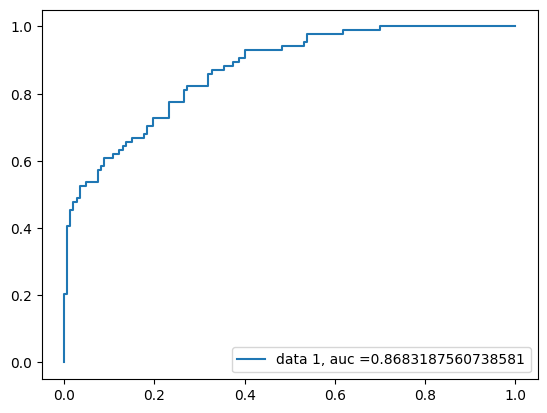

In [10]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc =' + str(auc))
plt.legend(loc=4)
plt.show()